# Plot the Galactic plane as a filled region

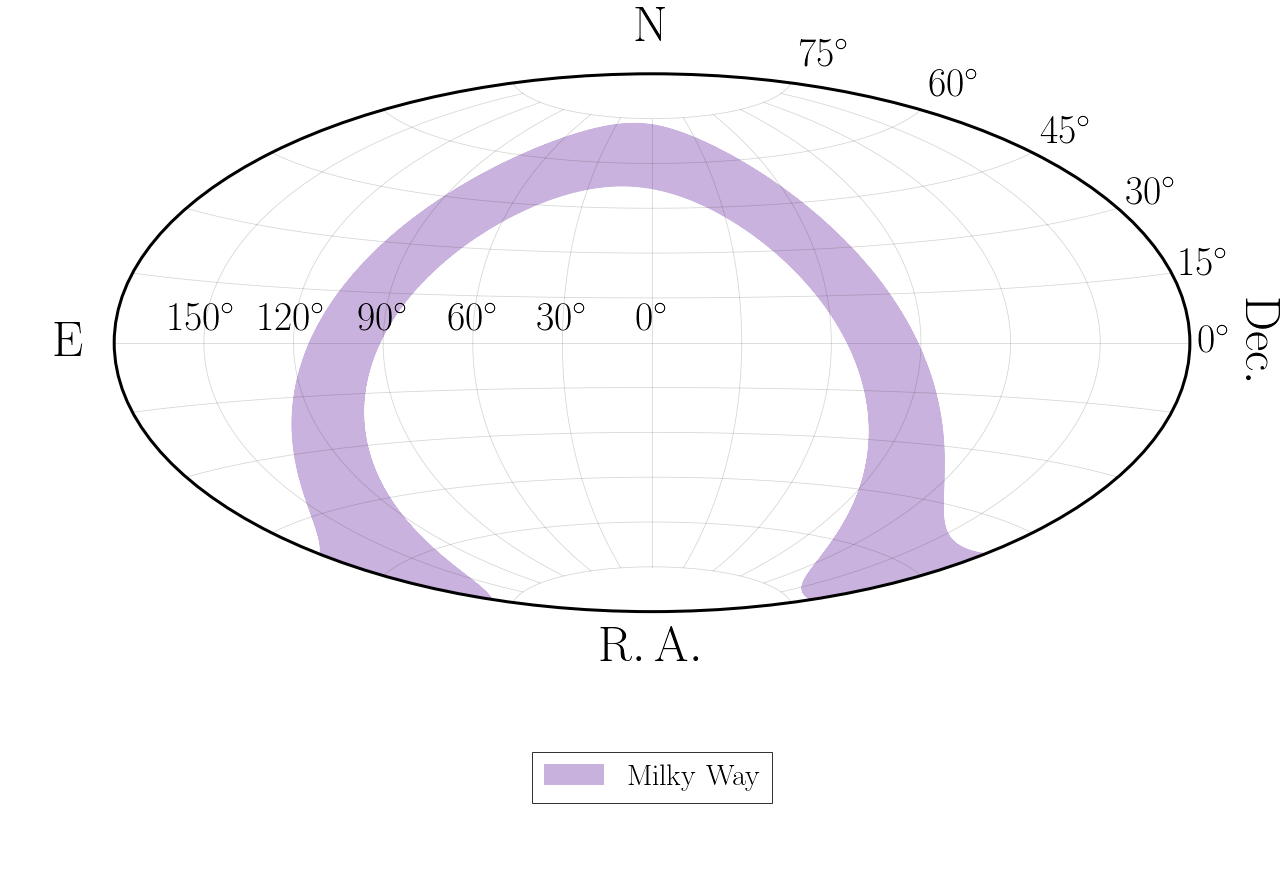

In [5]:
import matplotlib.gridspec as gridspec
import matplotlib.pylab as plt
import astropy.coordinates as coord
import astropy.units as u
import numpy as np
import pandas as pd

%matplotlib inline

fig=plt.figure(figsize=(18,12))
gs1=gridspec.GridSpec(2,1,height_ratios=[3,1])
ax1=fig.add_subplot(gs1[0],projection="aitoff")
ax2=fig.add_subplot(gs1[1])
ax2.axis("off")
plt.subplots_adjust(left=0.12,right=0.95,wspace=0.,bottom=0.07,top=0.95,hspace=0.)



## the Galactic plane
num_coords=800
Galactic_plane=pd.DataFrame(data={'GAL_LON': np.linspace(-1.*np.pi,1.*np.pi,num_coords),'GAL_LAT': np.repeat(0.,num_coords),'GAL_LOW': np.repeat(-10.*np.pi/180.,num_coords),'GAL_UPP': np.repeat(10.*np.pi/180.,num_coords)})

ICRS_coord_LOWER=coord.SkyCoord(np.linspace(-1.*np.pi,1.*np.pi,num_coords),np.repeat(-10.*np.pi/180.,num_coords),frame='galactic',unit='rad').icrs
RA_LOWER=coord.Angle(ICRS_coord_LOWER.ra.value*np.pi/180.*u.rad).wrap_at(np.pi*u.rad).value#-2.*np.pi
DEC_LOWER=ICRS_coord_LOWER.dec.value*np.pi/180.

ICRS_coord_MIDDLE=coord.SkyCoord(np.linspace(-1.*np.pi,1.*np.pi,num_coords),np.repeat(0.*np.pi/180.,num_coords),frame='galactic',unit='rad').icrs
RA_MIDDLE=coord.Angle(ICRS_coord_MIDDLE.ra.value*np.pi/180.*u.rad).wrap_at(np.pi*u.rad).value#-2.*np.pi
DEC_MIDDLE=ICRS_coord_MIDDLE.dec.value*np.pi/180.

ICRS_coord_UPPER=coord.SkyCoord(np.linspace(-1.*np.pi,1.*np.pi,num_coords),np.repeat(+10.*np.pi/180.,num_coords),frame='galactic',unit='rad').icrs
RA_UPPER=coord.Angle(ICRS_coord_UPPER.ra.value*np.pi/180.*u.rad).wrap_at(np.pi*u.rad).value#-2.*np.pi
DEC_UPPER=ICRS_coord_UPPER.dec.value*np.pi/180.

RA=np.append(RA_LOWER,RA_UPPER)
DEC=np.append(DEC_LOWER,DEC_UPPER)
G_PLANE=pd.DataFrame(data={"RA":RA,"DEC":DEC})
G_PLANE=G_PLANE.sort_values(by=['RA'])
ax1.plot(-G_PLANE.RA,G_PLANE.DEC,color="C4",alpha=0.5,zorder=-1)


## plot the key
ax2.fill_between([-1.,-1.],-1.,-1.,alpha=0.5,facecolor="C4",edgecolor="none",label=r"${\rm Milky\ Way}$")
ax2.set_xlim(-5.,-4.)
leg=ax2.legend(loc="lower center",ncol=3,markerscale=2.)


## aesthetics
ax1.set_xlabel(r"${\rm R.\,A.}$")
ax1.set_ylabel(r"${\rm Dec.}$",rotation=270.,labelpad=50.)
ax1.yaxis.tick_right()
ax1.tick_params(axis='y',which='both',length=0)
ax1.yaxis.set_label_position("right")
ax1.annotate(r"${\rm N}$",xy=(0.,1.2),xycoords=ax1.get_xaxis_transform(),fontsize=50.,ha='center',va='center')
ax1.annotate(r"${\rm E}$",xy=(-3.4,0.5),xycoords=ax1.get_xaxis_transform(),fontsize=50.,ha='center',va='center')   
plt.yticks(fontsize=36)
plt.xticks(fontsize=36)
ax1.set_xticklabels([r'$150^{\circ}$',r'$120^{\circ}$',r'$90^{\circ}$',r'$60^{\circ}$',r'$30^{\circ}$',r'$0^{\circ}$',r'$$',r'$$',r'$$',r'$$',r'$$'])
ax1.set_yticklabels([r'$$',r'$$',r'$$',r'$$',r'$$',r'$0^{\circ}$',r'$15^{\circ}$',r'$30^{\circ}$',r'$45^{\circ}$',r'$60^{\circ}$',r'$75^{\circ}$'])
ax1.grid(True,color="0.2")

